### RLab01 - Martina Cacciola (2097476)

## Exercise 1 - American Airlines Employees

In [3]:
library(rvest)
library(tidyverse)
library(lubridate)
library(dplyr)
library(tidyr)
library(ggplot2)
library(scales)

Loading required package: xml2
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()         masks stats::filter()
x readr::guess_encoding() masks rvest::guess_encoding()
x dplyr::lag()            masks stats::lag()
x purrr::pluck()          masks rvest::pluck()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is

The following files contain the number of part-time and full-time employees of the major airline companies in the United States.

## 1)
To read data from the four files, we use the `read.table` function, with specific arguments for header, separator, decimal point, and column classes. 
We then use the `mutate` function to create a new `Company` column for easy reference later on and convert the other columns to numeric format. The `gsub(",", "", .)` part removes any commas in the data, in order to read correctly the values.

In [2]:
am_air <- read.table(file = "american_airline_empl.txt", header = TRUE, sep = "", dec = ",", colClasses = rep("character", 5)) %>%
  mutate(Company = "AM") %>%
  mutate_at(vars(-Company), ~as.numeric(gsub(",", "", .))) 
  

delta_air <- read.table(file = "delta_airline_empl.txt", header = TRUE, sep = "", dec = ",", colClasses = rep("character", 5)) %>%
  mutate(Company = "DELTA") %>%
  mutate_at(vars(-Company), ~as.numeric(gsub(",", "", .))) 


fed_air <- read.table(file = "federal_express_empl.txt", header = TRUE, sep = "", dec = ",", colClasses = rep("character", 5)) %>%
  mutate(Company = "FED") %>%
  mutate_at(vars(-Company), ~as.numeric(gsub(",", "", .))) 
  

uni_air <- read.table(file = "united_airline_empl.txt", header = TRUE, sep = "", dec = ",", colClasses = rep("character", 5)) %>%
  mutate(Company = "UNI") %>%
  mutate_at(vars(-Company), ~as.numeric(gsub(",", "", .))) 

## 2)

In [3]:
# Merge the four tibbles using full_join()
merged_tibble <- full_join(am_air, delta_air) %>% 
                 full_join(fed_air) %>%
                 full_join(uni_air)
# Print the resulting merged tibble
merged_tibble

Joining, by = c("Month", "Year", "Fulltime", "Parttime", "GrandTotal", "Company")
Joining, by = c("Month", "Year", "Fulltime", "Parttime", "GrandTotal", "Company")
Joining, by = c("Month", "Year", "Fulltime", "Parttime", "GrandTotal", "Company")


Month,Year,Fulltime,Parttime,GrandTotal,Company
1,1990,68137,9039,77176,AM
2,1990,68725,9273,77998,AM
3,1990,69509,9376,78885,AM
4,1990,69713,9326,79039,AM
5,1990,70376,9309,79685,AM
6,1990,71258,9369,80627,AM
7,1990,72018,9651,81669,AM
8,1990,72513,9694,82207,AM
9,1990,72776,9788,82564,AM
10,1990,73111,9737,82848,AM


## 3)
To produce a plot of the behaviour of the employees as a function of time, we create a `Date` column in the `merged_tibble` dataset by concatenating the `Year` and `Month` columns and converting them into a date format.

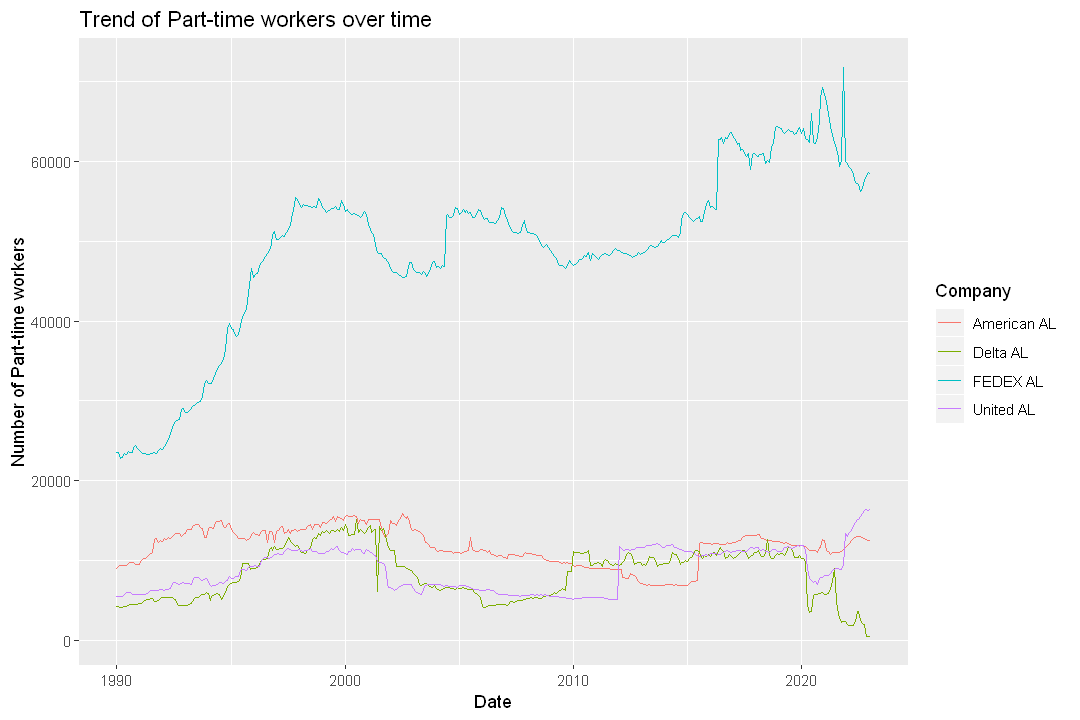

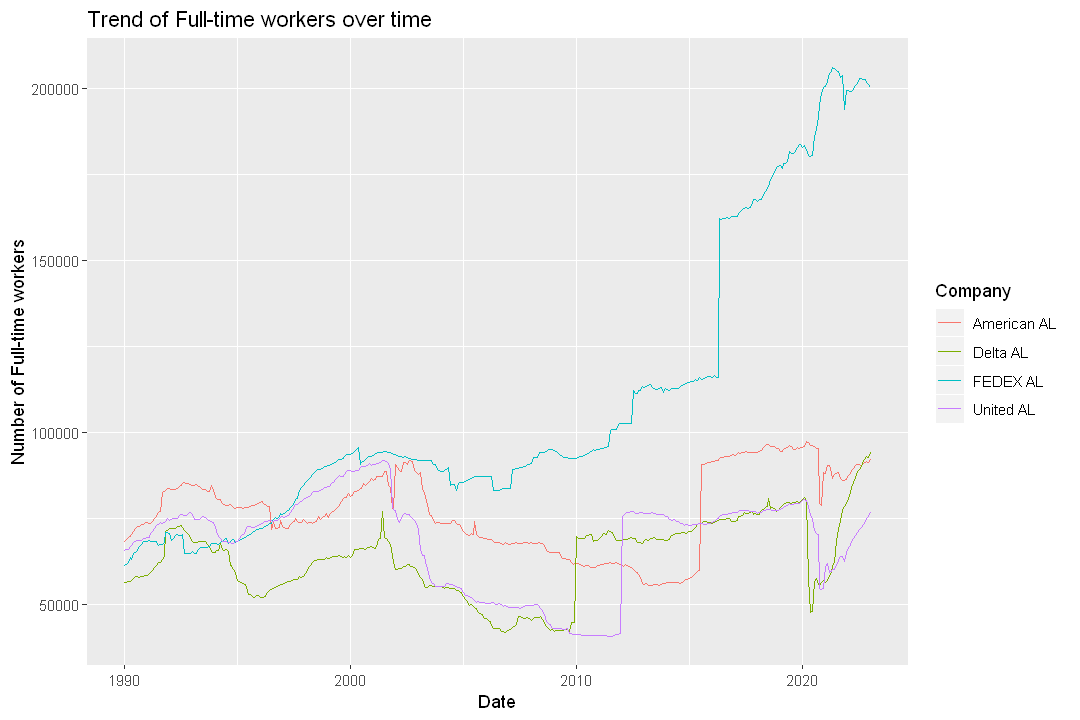

In [7]:
# Create a date column by pasting the Year and Month columns together, and convert to a date format
merged_tibble <- merged_tibble %>%
  mutate(Date = as.Date(paste0(Year, "-", Month, "-01")))

# Plot the trend of Part-time workers over time
ggplot(merged_tibble, aes(x = Date, y = Parttime, colour=Company)) +
  geom_line() +
  labs(x = "Date", y = "Number of Part-time workers") +
  scale_color_discrete(name = "Company", 
                      labels = c("American AL", "Delta AL", "FEDEX AL", "United AL"))+
  ggtitle("Trend of Part-time workers over time")
  options(repr.plot.width=9, repr.plot.height=6)

# Plot the trend of Full-time workers over time
ggplot(merged_tibble, aes(x = Date, y = Fulltime, colour=Company)) +
  geom_line() +
  labs(x = "Date", y = "Number of Full-time workers") +
  scale_color_discrete(name = "Company", 
                      labels = c("American AL", "Delta AL", "FEDEX AL", "United AL"))+
  ggtitle("Trend of Full-time workers over time")
options(repr.plot.width=9, repr.plot.height=6)

## 4)

We first group the data by each company with the `group_by()` function , then `filter()` is used to select only the rows corresponding to the minimum and maximum total of employees for each company. Finally, with `summarize()` we compute the time when the minimum and maximum values are reached.

The resulting `min_empl` and `max_empl` data frames will have one row per company, with columns for company name, year, and month of the minimum or maximum number of employees, respectively.

In [26]:
min_empl <- merged_tibble %>%
  group_by(Company) %>%
  filter(GrandTotal == min(GrandTotal)) %>%
  summarize(min_year = min(Year), min_month = min(Month))

max_empl <- merged_tibble %>%
  group_by(Company) %>%
  filter(GrandTotal == max(GrandTotal)) %>%
  summarize(max_year = max(Year), max_month = max(Month))

min_empl
max_empl

Company,min_year,min_month
AM,2013,9
DELTA,2006,11
FED,1990,1
UNI,2011,6


Company,max_year,max_month
AM,2018,6
DELTA,2023,1
FED,2021,3
UNI,2001,3


## 5)

We first create a new column `fraction` that stores the ratio of part-time workers to total employees for each month/year combination, by using the `mutate` function.

We then create a ggplot object using the `ggplot()` function and specify the `merged_tibble` data frame as the data source. Specifically the `date` column is a result of the `mutate` function, that, in this way, is pasting together the `Year` and `Month` columns.

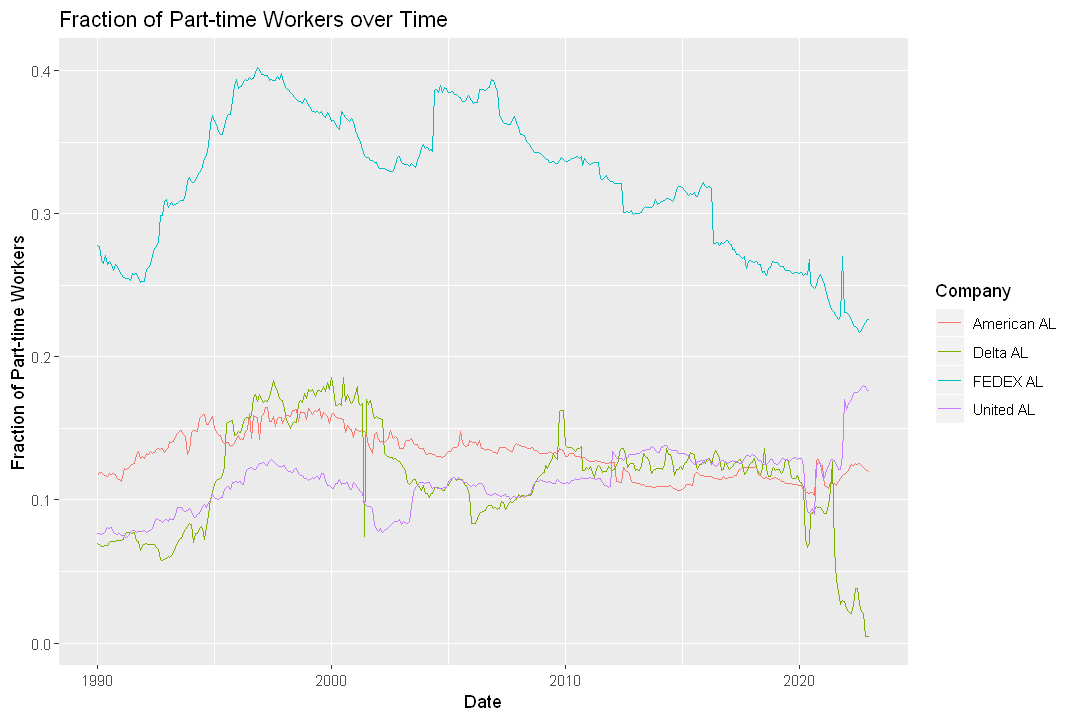

In [8]:
merged_tibble <- merged_tibble %>%
  mutate(fraction = Parttime / GrandTotal)

ggplot(merged_tibble, aes(x = Date, y = fraction, colour=Company)) +
  geom_line()+
  labs(x = "Date", y = "Fraction of Part-time Workers") +
  scale_color_discrete(name = "Company", 
                      labels = c("American AL", "Delta AL", "FEDEX AL", "United AL"))+
  ggtitle("Fraction of Part-time Workers over Time") 
options(repr.plot.width=9, repr.plot.height=6)

## 6)

We create a new tibble by filtering the `merged_tibble` to include only data from the year 2018 onwards.

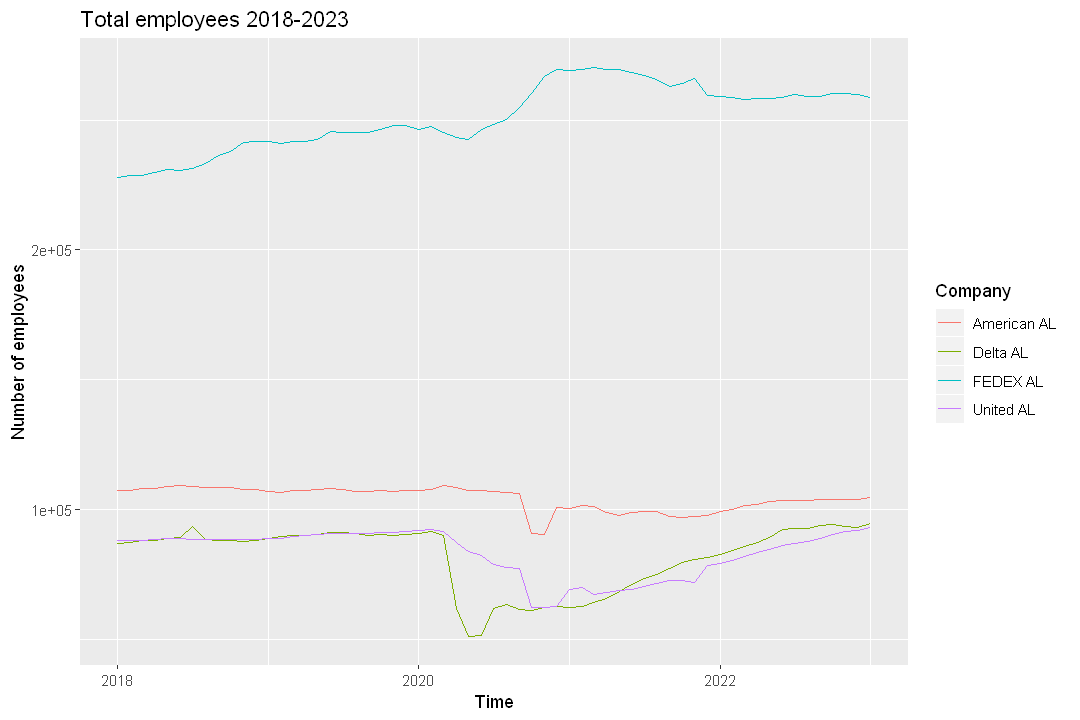

In [12]:
tibble_covid <- merged_tibble %>% filter(Year>=2018) %>% select(Date, GrandTotal, Company)
covid <- ggplot(tibble_covid, aes(x = Date, y = GrandTotal, color = Company)) +
        geom_line() +
        labs(title = "Total employees 2018-2023",
        x = "Time",
        y = "Number of employees") +
        scale_color_discrete(name = "Company", 
                      labels = c("American AL", "Delta AL", "FEDEX AL", "United AL"))
        options(repr.plot.width=9, repr.plot.height=6)
print(covid)

It is evident a decrease of the number of total employees in every company. The company experiencing the larger loss of employees during the pandemic is Delta Airlines. American and United Airlines had a significant decrease in the last months of 2020. In the following years, we can see a positive trend in the number of employees, especially for Delta Airlines. The other companies seem stabilizing around a pretty much constant value.

## Exercise 2 - Data Frames and Tibble

In [4]:
install.packages("nycflights13")
library(nycflights13)

package 'nycflights13' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\Rtmpak1Zuv\downloaded_packages


Warning message:
"package 'nycflights13' was built under R version 3.6.3"

## 1.1)
We first create a new data frame called `daily_flights` that summarizes the number of flights departed each day from each airport. We use the `group_by()` and `summarize()` functions to group the flights data by year, month, day, and origin, and then calculate the total number of flights for each group.

We then use `ggplot()` to create the histogram of the total number of flights departed from each of the three NYC airports as a function of time.

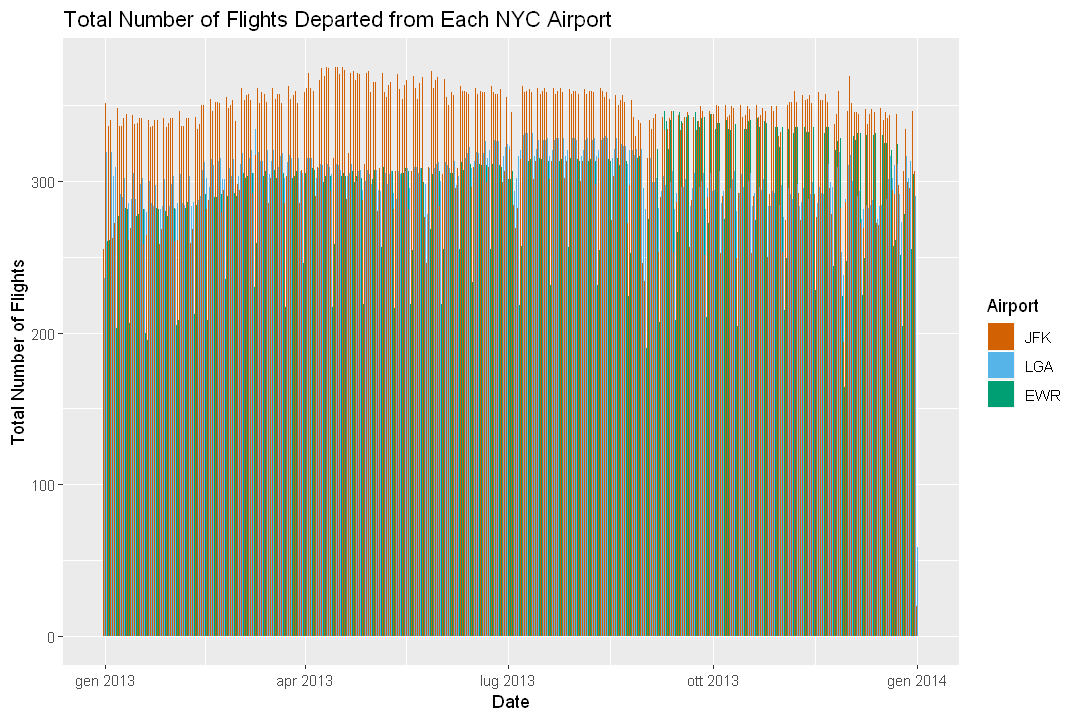

In [6]:
daily_flights <- mutate(flights, day = as.Date(time_hour)) %>%
                  group_by(origin, day) %>%
                  ungroup()
     

dailyflights_plot <- ggplot(daily_flights, aes(x = day, fill = origin)) +
                  geom_histogram(binwidth = 1, position = "dodge") +
                  labs(title = "Total Number of Flights Departed from Each NYC Airport",
                       x = "Date",
                       y = "Total Number of Flights") +
                  scale_fill_manual(name = "Airport",
                                     values = c("#D16103", "#56B4E9", "#009E73"),
                                     labels = c("JFK", "LGA", "EWR"))
                  options(repr.plot.width=9, repr.plot.height=6)
print(dailyflights_plot)

## 1.2)
We first add two new data frames `weekday_flights` and `weekend_flights`. With `filter` we select only the first five working days of the week and the weekend days, for the two cases respectively. Then, we group the flights by week number and day of the week and computes the total number of flights for each group using `summarize()`.

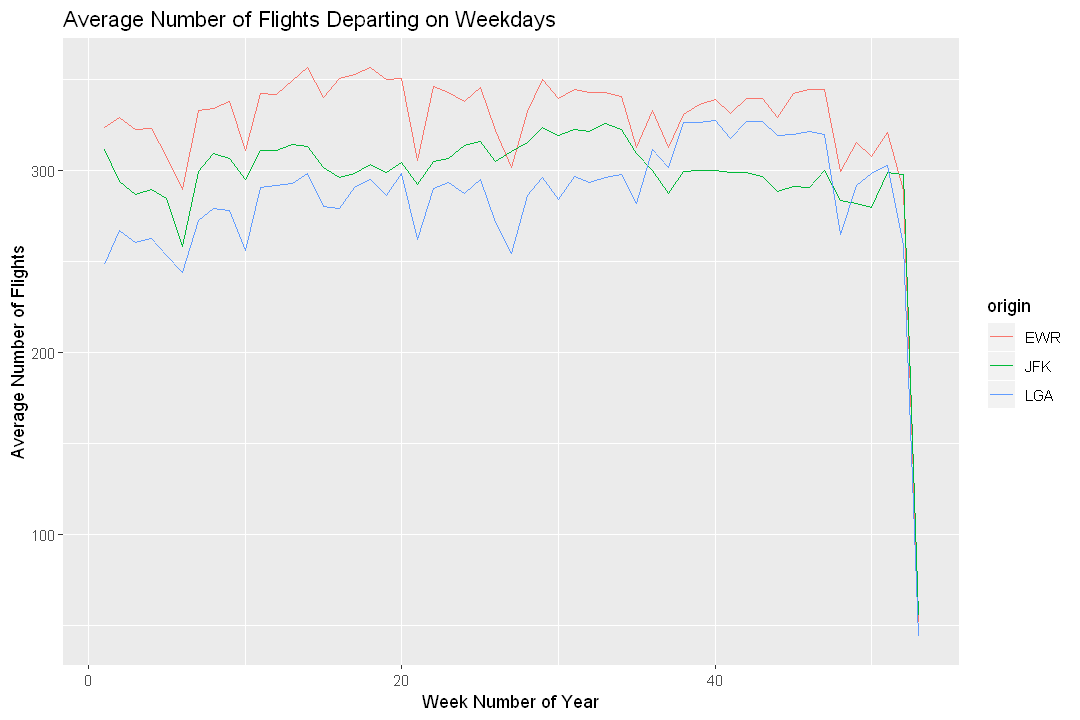

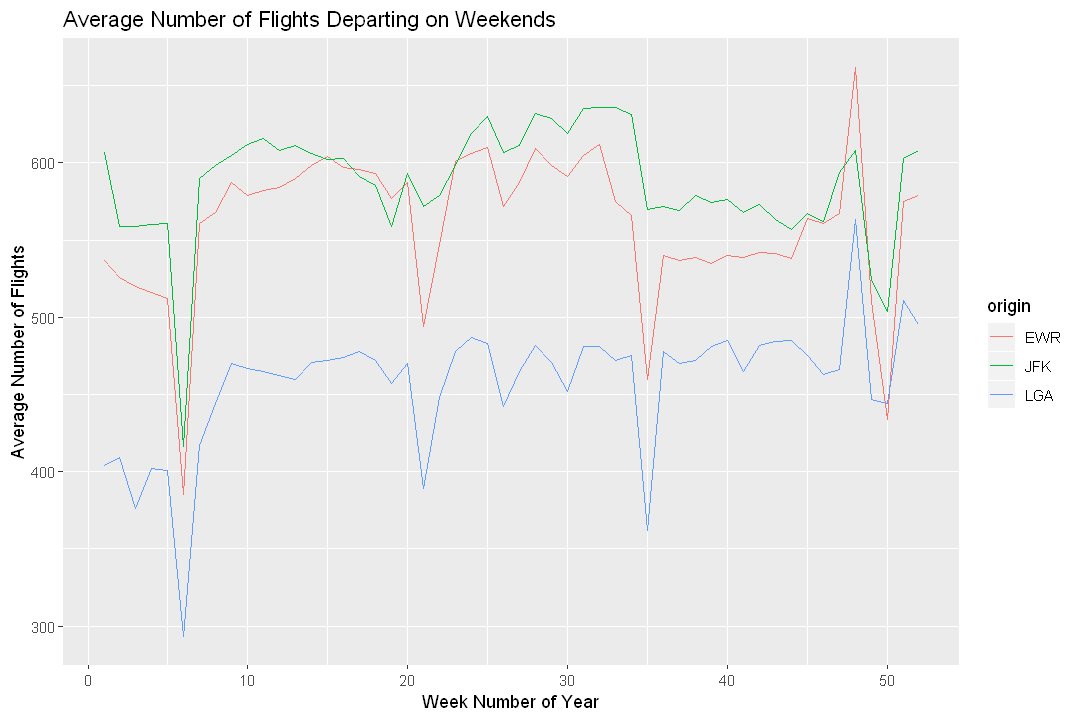

In [95]:
# Compute average number of flights departing on first five working days of the week
weekday_flights <- flights_clean %>%
  filter(day_of_week %in% c("dom", "mar", "mer", "gio", "ven")) %>%
  group_by(origin, year, week_number) %>%
  summarize(avg_flights = n() / 5)

# Plot average number of weekday flights by week number
ggplot(weekday_flights, aes(x = week_number, y = avg_flights, color = origin)) +
  geom_line() +
  labs(title = "Average Number of Flights Departing on Weekdays",
       x = "Week Number of Year", y = "Average Number of Flights")

# Compute average number of flights departing on weekends (Sat, Sun)
weekend_flights <- flights_clean %>%
  filter(day_of_week %in% c("sab", "dom")) %>%
  group_by(origin, year, week_number) %>%
  summarize(avg_flights = n())

# Plot average number of weekend flights by week number
ggplot(weekend_flights, aes(x = week_number, y = avg_flights, color = origin)) +
  geom_line() +
  labs(title = "Average Number of Flights Departing on Weekends",
       x = "Week Number of Year", y = "Average Number of Flights")

## 2.1)

To compute the departure delay for each flight, the `dep_time` (the actual departure time) can be subtracted from `sched_dep_time` (the scheduled departure time). To prepare the data for processing, we convert all the values in both columns to a proper time format. Moreover, to get rid of eventual missing values, it is necessary to clean the dataset of any cancelled flight.

At this point, it is possible to extract the min, max and average delay for each day of the year (separetely for each airport). 

In [8]:
# Clean the data
flights_clean <- flights %>%
  # Filter out cancelled flights
  filter(!is.na(dep_time), !is.na(arr_time)) %>%
  # Convert times to POSIXct format
  mutate(
    dep_time = as.POSIXct(paste(year, month, day, dep_time, sep = "-"), format = "%Y-%m-%d-%H%M", tz = "UTC"),
    sched_dep_time = as.POSIXct(paste(year, month, day, sched_dep_time, sep = "-"), format = "%Y-%m-%d-%H%M", tz = "UTC")
  )

# Compute departure delay
flights_clean <- flights_clean %>%
  mutate(dep_delay = dep_time - sched_dep_time)
# Print dep_delay column
#print(flights_clean$dep_delay)

We first create a new column called `day`, which extracts the date from the `time_hour` column. Then, we group the data by the `origin` and `day` columns, and calculates the maximum, minumum and average departure delay for each group, while ignoring missing values using the `na.rm` argument. Next, the `na.omit()` function is used to remove any rows with missing values in the column.

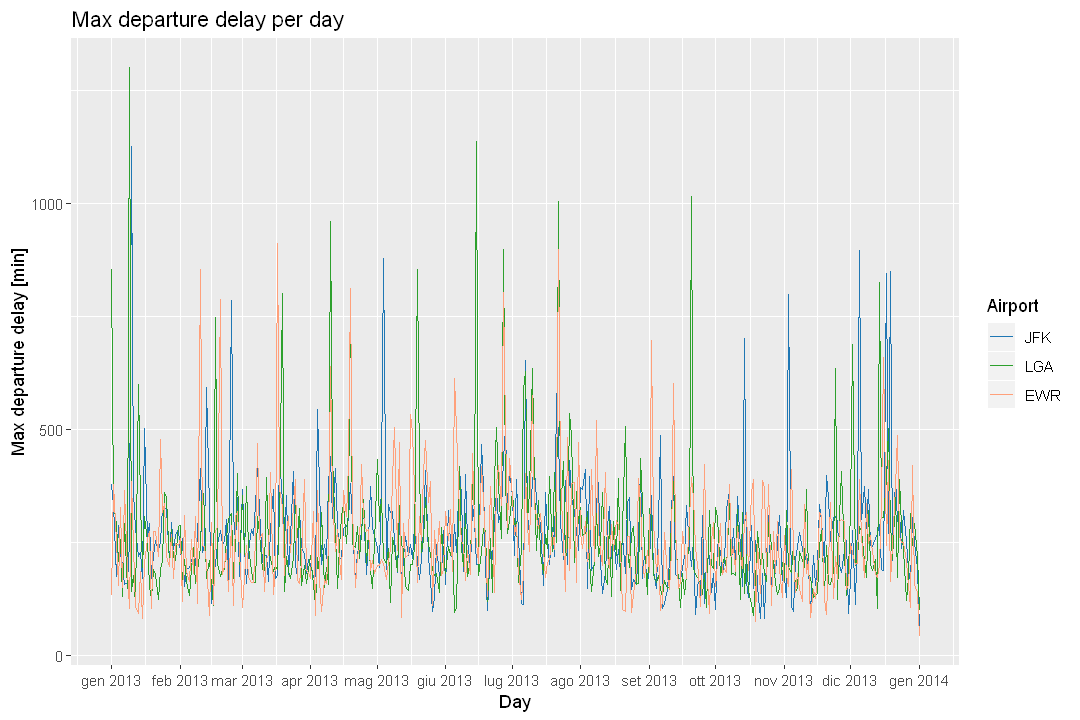

In [24]:
max_delay <- flights %>%
  mutate(day = as.Date(time_hour)) %>%
  group_by(origin, day) %>%
  summarize(max_dep_del = max(dep_delay, na.rm = TRUE)) %>%
  na.omit()

max_delay_plot <- ggplot(max_delay, aes(x = day, y = max_dep_del, color = origin)) +
  geom_line() +
  labs(title = "Max departure delay per day",
       x = "Day",
       y = "Max departure delay [min]") +
  scale_color_manual(name = "Airport",
                     values = c("#1F77B4",  "#2CA02C", "#FFA07A"),
                     labels = c("JFK", "LGA", "EWR")) +
  scale_x_date(limits = c(as.Date("2013-01-01"), NA),
               breaks = date_breaks("1 month"),
               labels = date_format("%b %Y")) 

options(repr.plot.width=9, repr.plot.height=6)
print(max_delay_plot)

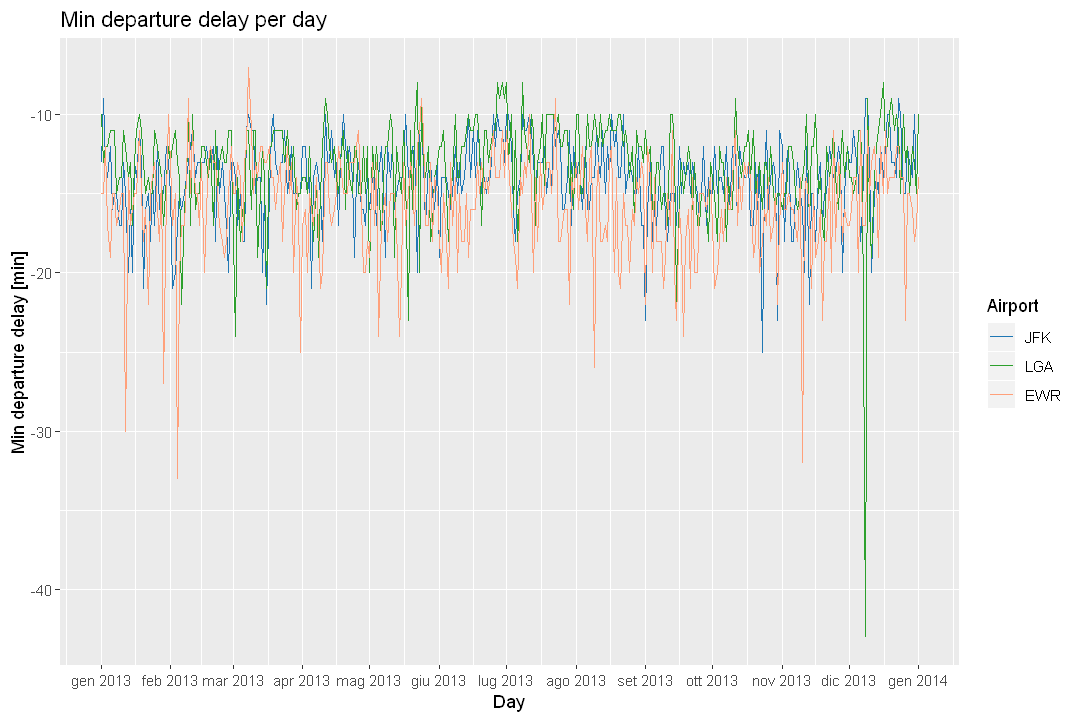

In [26]:
min_delay <- flights %>%
  mutate(day = as.Date(time_hour)) %>%
  group_by(origin, day) %>%
  summarize(min_dep_del = min(dep_delay, na.rm = TRUE)) %>%
  na.omit()

min_delay_plot <- ggplot(min_delay, aes(x = day, y = min_dep_del, color = origin)) +
  geom_line() +
  labs(title = "Min departure delay per day",
       x = "Day",
       y = "Min departure delay [min]") +
  scale_color_manual(name = "Airport",
                     values = c("#1F77B4",  "#2CA02C", "#FFA07A"),
                     labels = c("JFK", "LGA", "EWR")) +
  scale_x_date(limits = c(as.Date("2013-01-01"), NA),
               breaks = date_breaks("1 month"),
               labels = date_format("%b %Y")) 

options(repr.plot.width=9, repr.plot.height=6)
print(min_delay_plot)

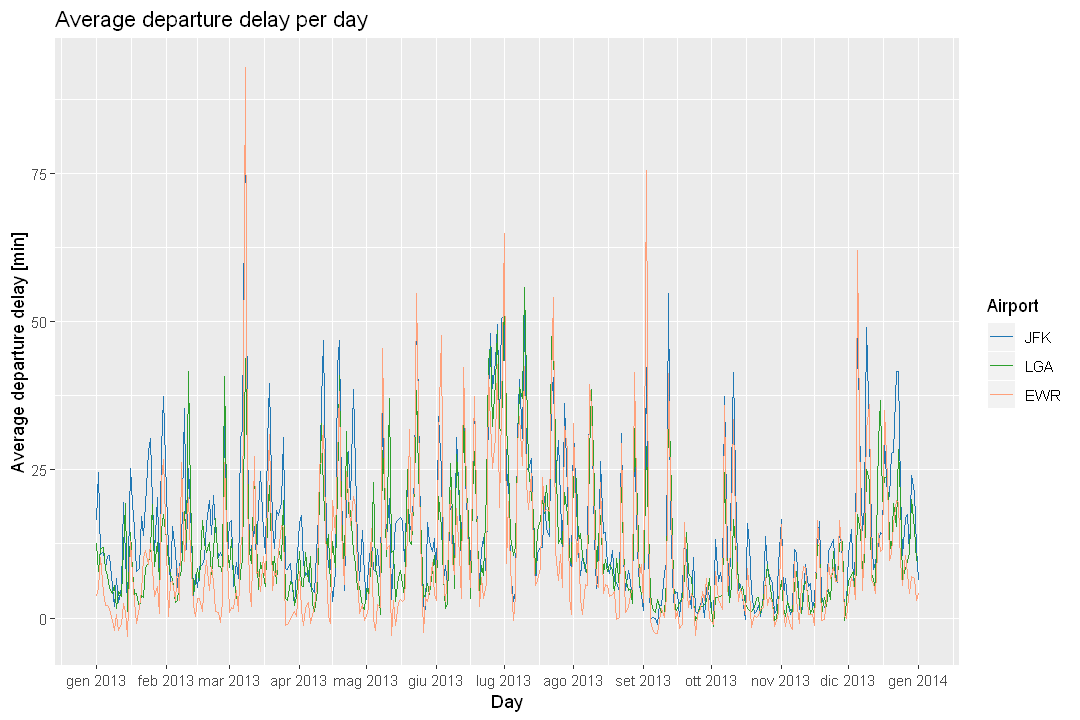

In [25]:
avg_delay <- flights %>%
  mutate(day = as.Date(time_hour)) %>%
  group_by(origin, day) %>%
  summarize(avg_dep_del = mean(dep_delay, na.rm = TRUE)) %>%
  na.omit()

avg_delay_plot <- ggplot(avg_delay, aes(x = day, y = avg_dep_del, color = origin)) +
  geom_line() +
  labs(title = "Average departure delay per day",
       x = "Day",
       y = "Average departure delay [min]") +
  scale_color_manual(name = "Airport",
                     values = c("#1F77B4",  "#2CA02C", "#FFA07A"),
                     labels = c("JFK", "LGA", "EWR")) +
  scale_x_date(limits = c(as.Date("2013-01-01"), NA),
               breaks = date_breaks("1 month"),
               labels = date_format("%b %Y")) 

options(repr.plot.width=9, repr.plot.height=6)
print(avg_delay_plot)

## 3)
We compute the speed of each flight in our approximation by dividing the `distance` over the `air_time` values. This result is converted in km/h. We then create a new tibble with an additional column `day` that contains the date component of the `time_hour` variable, calculate the average speed for each day, and remove rows with missing values.

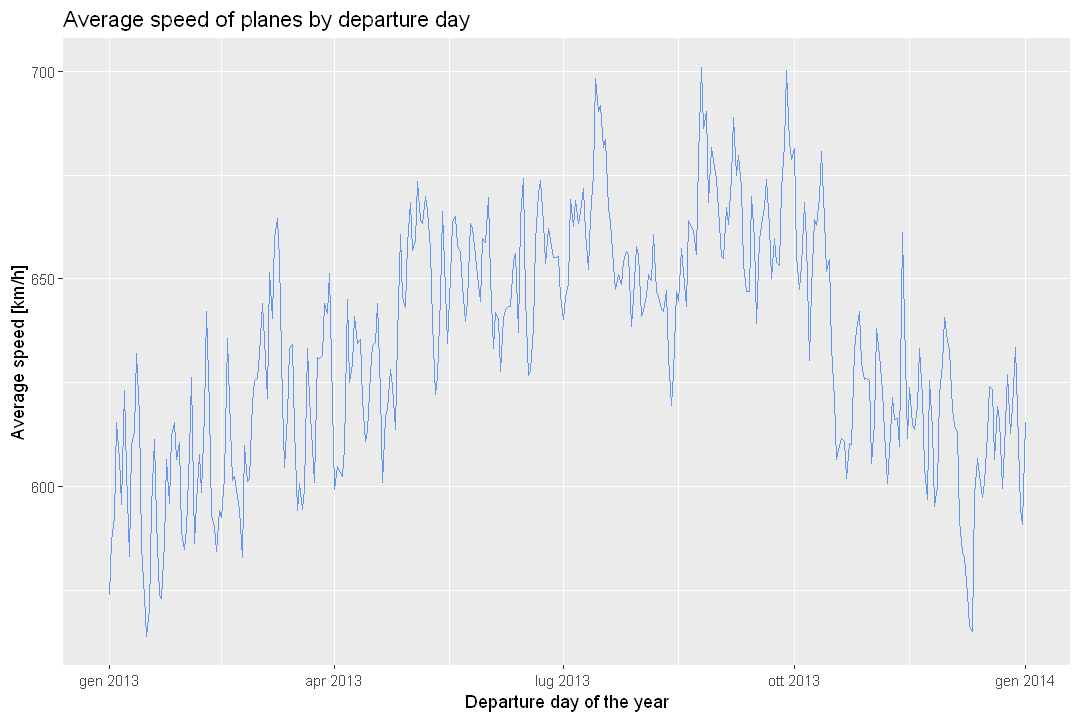

In [43]:
speed_mile <- flights$distance / flights$air_time #in miles/minutes
speed_km <- speed_mile * 96.5606 #convert in km/h
 
flights_speed <- mutate(flights, day = as.Date(time_hour)) %>%
             mutate(speed = speed_km) %>%
             na.omit()%>%
             group_by(day) %>% 
             summarise(avg_speed = mean(speed))

ggplot(flights_speed, aes(x = day, y = avg_speed)) +
  geom_line(color='cornflowerblue') +
  labs(x = "Departure day of the year", y = "Average speed [km/h]") +
  ggtitle("Average speed of planes by departure day")

## 4.1)
We first define two data frames, `top_flights_day` and `top_flights_week`, that group flights by carrier, day, and week, respectively, and calculate the total number of flights per day and per week for each carrier.

The function `top_n()` is used to extract the top two airline companies by the number of flights per day and per week, respectively. We extract the top `n` rows, with `wt` argument specifying the variable to use for ordering.

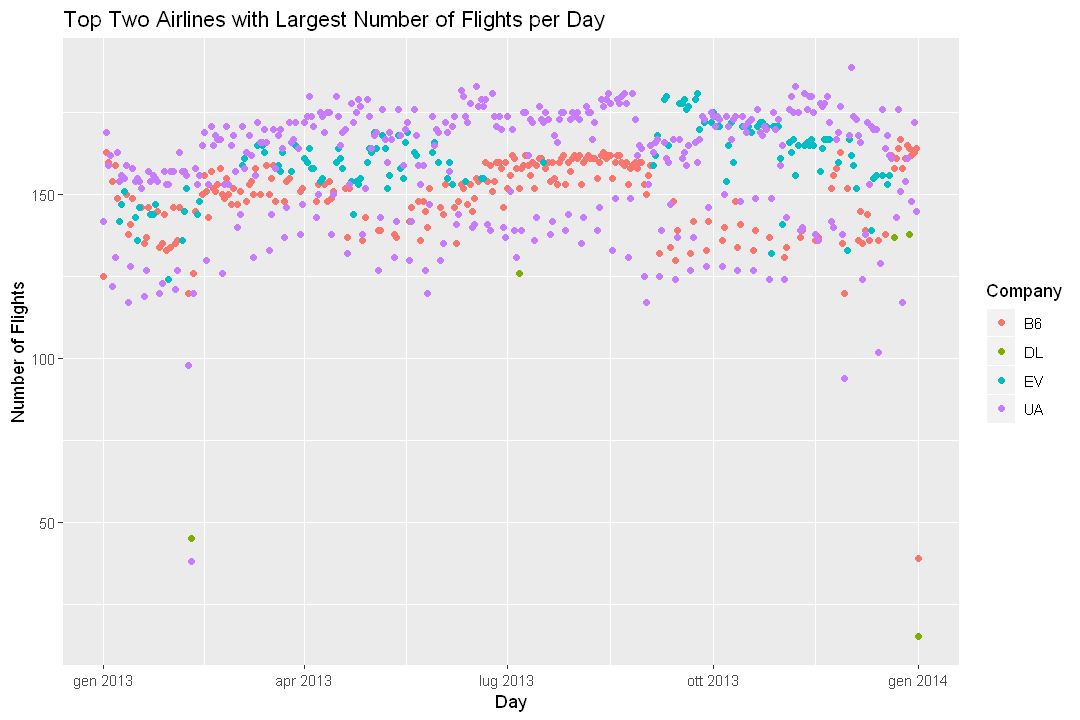

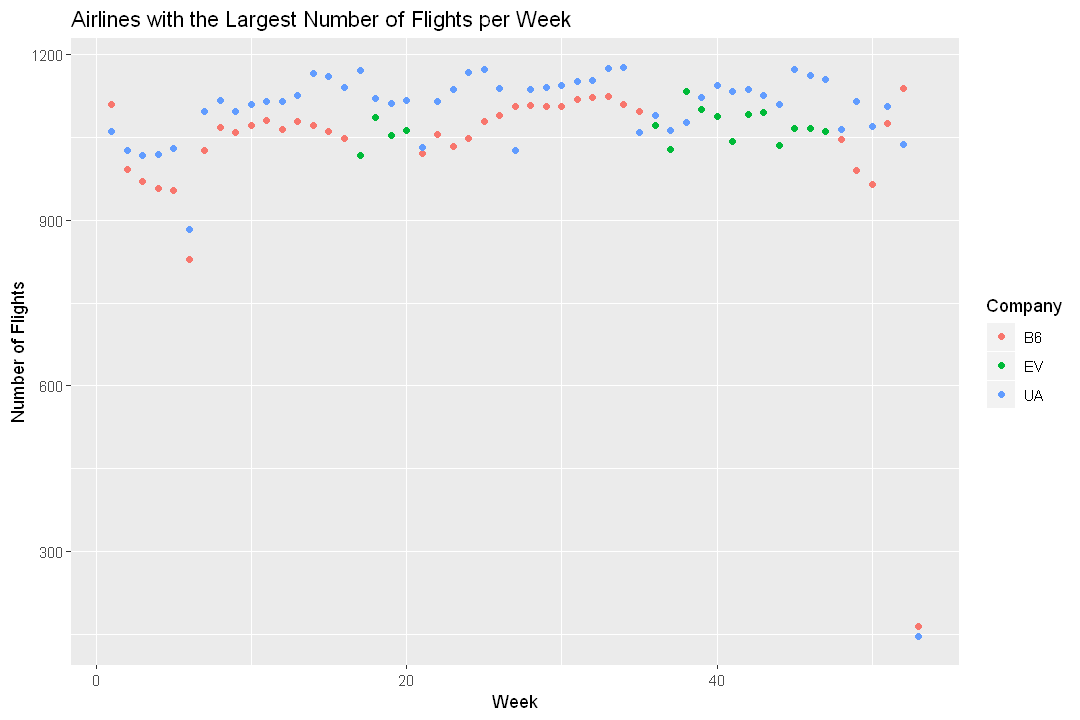

In [42]:
# Find the airline companies offering the largest two numbers of flights per day and per week
# Group flights by carrier, date, and week, and count the number of flights per day and per week

top_flights_day <- mutate(flights, day = as.Date(time_hour)) %>%
  na.omit()%>%
  group_by(carrier, day) %>% 
  summarise(count = n())

top_flights_week <- mutate(flights, day = as.Date(time_hour)) %>%
  na.omit()%>%
  mutate(week = week(day)) %>%
  group_by(carrier, week) %>% 
  summarise(count = n())
     
top_day <- top_flights_day %>%
  group_by(day) %>%
  top_n(2, wt = count)

top_week <- top_flights_week %>%
  group_by(week) %>%
  top_n(2, wt = count)
     
# Plot the results
top_day_plot <- ggplot(top_day, aes(x = day, y=count, color=carrier))+
  geom_point() +
  labs(title = "Top Two Airlines with Largest Number of Flights per Day",
       x = "Day",
       y = "Number of Flights",
       color = "Company") 
print(top_day_plot)

top_week_plot <- ggplot(top_week, aes(x = week, y=count, color=carrier))+
  geom_point() +
  labs(title = "Airlines with the Largest Number of Flights per Week",
       x = "Week",
       y = "Number of Flights",
       color = "Company") 
print(top_week_plot)

## 4.2)
We first create the `flights_month` dataframe, by grouping the flights values by carrier and month, and summarizing the total number of flights per month. Next, the `top_n()` function is used with a negative value of -1 to select the row with the smallest `total_flights_month` value for each month. The resulting data frame is stored in `avg_flights_month`. 

A bar chart is created using `geom_bar`, where `stat = "identity"` indicates to use the values in the data frame as the height of the bars and `position = "dodge"` specifies the bar position, meaning the bars belonging to different airlines are positioned side by side.

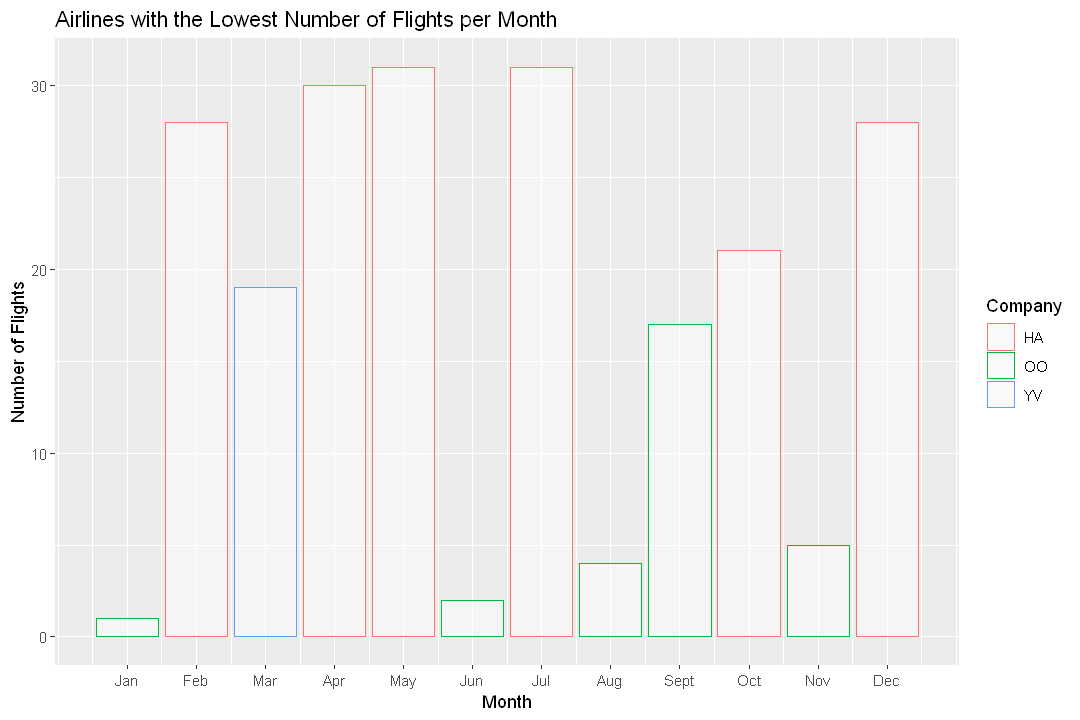

In [9]:
# Find the airline company offering the smallest number of flight per month
flights_month <- mutate(flights, day=as.Date(time_hour)) %>%
  na.omit() %>%
  mutate(month = month(day)) %>%
  group_by(carrier, month) %>%
  summarize(total_flights_month = n()) 
avg_flights_month <- flights_month %>%
  group_by(month) %>%
  top_n(-1, wt = total_flights_month)

labels_months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec")

month_plot <- ggplot(avg_flights_month, aes(x=month, y=total_flights_month, color=carrier))+
              geom_bar(fill='white', alpha=0.5, stat = "identity", position = "dodge") +
              labs(title = "Airlines with the Lowest Number of Flights per Month",
               x = "Month",
               y = "Number of Flights",
               color = "Company") +
              scale_x_continuous(breaks=seq(1,12,1), labels=labels_months)

print(month_plot)

## 4.3)
We first create the `long_dist` dataframe by grouping the values by month and carrier and summarizing the maximum distance flown by each carrier in each month. In particular, we use the `summarize()` function to find the carrier company that had the longest distance flight in each month, and their maximum distance flown. The `carrier[which.max(max_dist)]` retrieves the carrier name corresponding to the maximum distance flown, and `max_dist[which.max(max_dist)]` retrieves the corresponding maximum distance.

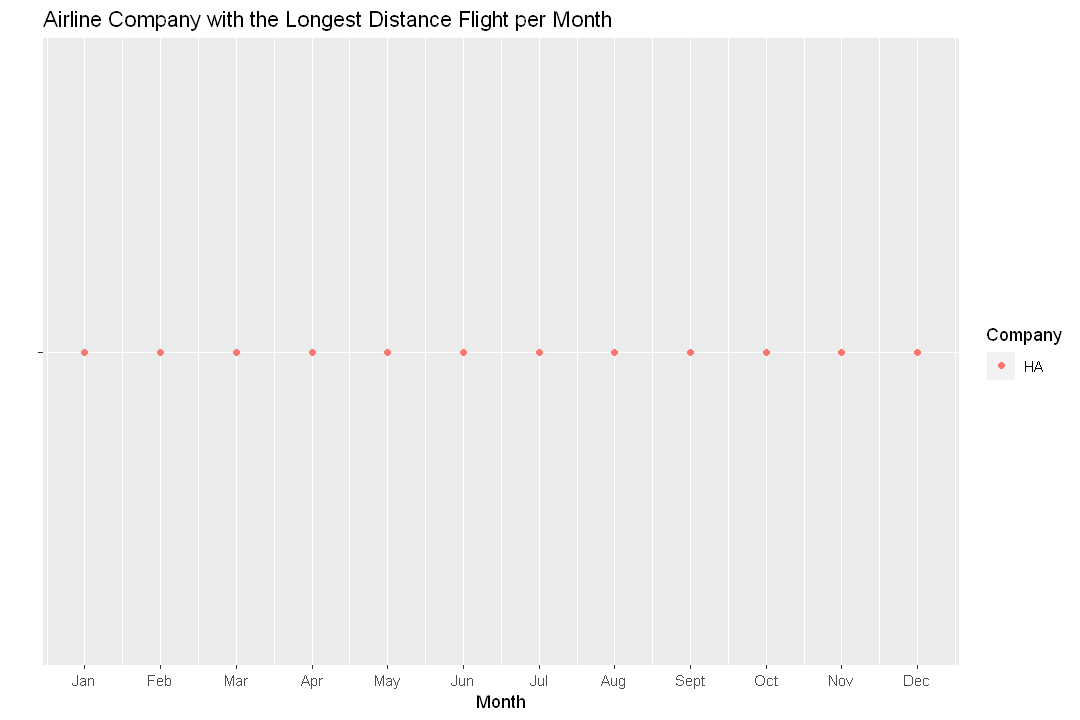

In [16]:
# Find the airline company offering the longest distance flight per month
long_dist_month <- mutate(flights, day = as.Date(time_hour)) %>%
  na.omit() %>%
  mutate(month = month(day)) %>%
  group_by(carrier, month) %>%
  summarize(max_dist = max(distance)) 

long_dist <- long_dist_month %>% 
   group_by(month) %>%
   summarize(company = carrier[which.max(max_dist)], max_distance = max_dist[which.max(max_dist)])
     
# Plot the results
dist_flight_plot <- ggplot(long_dist, aes(x=month, y=company, color=company))+
              geom_point() +
              labs(title = "Airline Company with the Longest Distance Flight per Month",
               x = "Month",
               y=' ',
               color="Company")+
              scale_x_continuous(breaks=seq(1,12,1), labels=labels_months) + 
              scale_y_discrete(labels=' ')
              
options(repr.plot.width=9, repr.plot.height=6)
print(dist_flight_plot)